In [1]:
import numpy as np

# Die that kills the game if shows 6

    Two problems:

    1. start from 0, keep rolling until either you stop or 6 is shown, your payoff is the last value shown
    2. same thing, but payoff is sum of faces shown, unless it is 6, in that case you lose everything

    Compute: 
    
    a. optimal stopping rule
    b. expected payoff in optimal setting
    c. expected number of draws in optimal strategy.

### Problem 1
optimal stopping rule is stop if die rolls more or equal than 3 (see book from Lawler Chapter 4);

average number of throws is obtained as the average length of a sequence of Bernoullians with $p=1/3$ chance of continuation (die shows 1 or 2).

### Problem 2
optimal stopping rule is stop if your budget exceeds 14 as $b\geq E[b+X]=\frac16(b+1)+..+\frac16(b+5)+\frac16\cdot 0=\frac 56 b+2.5$.

Call $v(i)$ the value of a position holding $i$ as a budget. Then:
$$ v(i)=\frac16\sum_{j=1}^5 v(i+j).$$
Starting from $i=14$ and going back to $i=0$ one finds $v(0)=6.153$ (see below).

## Value function of problem 1

In [2]:
P = np.array([ [1/6 for i in range(6)] ]*5 + [ [0 for i in range(5)] + [1] ])
v = np.array([5]*5 + [0])
f = np.array([1,2,3,4,5,0])

d = 1
while d > 1e-18:
    vp1 = np.maximum(f,P.dot(v))
    d = np.linalg.norm(vp1-v)
    v = vp1

print(v.mean())

3.0


## Value function and average time to completion of problem 2

In [3]:
v = [0 for i in range(15)] + [15,16,17,18,19]
N = [0 for i in range(20)]
p = [0 for i in range(15)] + [1,1,1,1,1]

for i in range(14,-1,-1):
    v[i] = sum(v[i+1:i+6])/6
    N[i] = sum(N[i+1:i+6])/6 + 1/6*0 + 1
    p[i] = sum(p[i+1:i+6])/6

print(N[0],v[0],p[0])

3.7332918532839066 6.1537379284031894 0.377784691119349


# Snell envelope of problem 2

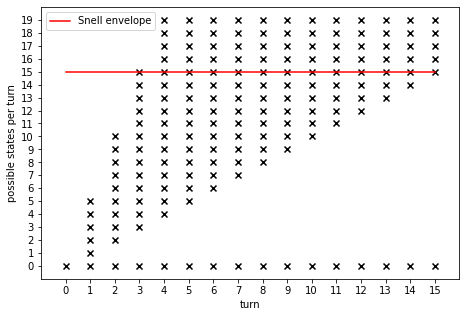

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7.5,5))

plt.xticks([i for i in range(16)])
plt.yticks([i for i in range(20)])

plt.xlabel('turn')
plt.ylabel('possible states per turn')

for i in range(16):
    env_y = [ 0 ] + [ j for j in range(i,5*i+1) if j < 20 and i > 0 ]
    env_x = [ i ]*len(env_y)

    plt.xlim((-1,16))
    plt.ylim((-1,20))
    plt.scatter(env_x,env_y,marker = 'x', color = 'black')

plt.plot([0,15],[15,15],color = 'red', label = 'Snell envelope')

plt.legend()
plt.show()

## MC for problem 1

In [4]:
games = range(100000)

avg_rolls = 0
avg_win = 0

for game in games:
    rolls = 0
    while True:
        die = np.random.randint(1,7)
        rolls += 1
        if die == 6:
            break
        if die > 2:
            avg_win += die
            break
    avg_rolls += rolls

avg_rolls /= len(games)
avg_win   /= len(games)

print(avg_rolls,avg_win)

1.4978 3.00791


## MC for problem 2

In [6]:
games = range(1000000)

avg_rolls = 0
avg_win = 0
wins = 0

for game in games:
    b = 0
    rolls = 0
    while True:
        die = np.random.randint(1,7)
        rolls += 1
        if die == 6:
            break
        b += die
        if b > 14:
            avg_win += b
            wins += 1
            break
    avg_rolls += rolls

avg_rolls /= len(games)
avg_win   /= len(games)
wins      /= len(games)

print(avg_rolls,avg_win,wins)

3.73083 6.149407 0.377484
